# Lead Scoring Assignment

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)

# Step 1: Importing & Understanding the Leads Dataset

In [3]:
#Importing the leads dataset using pandas and reading and understanbding the first 5 and last 5 rows of the sataset
Leads_Conversion=pd.read_csv("Leads.csv")
Leads_Conversion.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Leads_Conversion.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [5]:
# Looking at the dimensions of the dataframe
Leads_Conversion.shape

(9240, 37)

In [6]:
#Statistical summary of the dataframe
Leads_Conversion.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Check all the columns and their datatypes
Leads_Conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 2: Data Cleaning and Preparation

#### There are 4 columns that have substantial number of values as "Select". Basically the customer has not filled / given any input for the follwoing 4 columns:
- Specialization
- How did you hear about X Education
- Lead Profile
- City

We need to replace these "Select"values to nan

### Checking Missing/Null values & treating them

In [8]:
# Replacing "Select" to nan and checking the percentage of null values
Lead_Conversion=Leads_Conversion.replace('Select',np.nan)
round(100*Lead_Conversion.isnull().sum()/len(Lead_Conversion),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Dropping the columns with null values >= 50%

In [9]:
# Create a new dataframe to drop the  columns with null values >=50%.
Lead_Conversion=Lead_Conversion.drop(['Lead Profile','Lead Quality','How did you hear about X Education'],axis=1)
Lead_Conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
#Checking unique values for each column
Lead_Conversion.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [11]:
#dropping the columns with only one distinct/unique value and no null values.
Lead_Conv=Lead_Conversion.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)
Lead_Conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Prospect ID and Lead Number are unique values for each lead. Hence they can be dropped


In [12]:
Lead_Conv_New=Lead_Conv.drop(['Prospect ID','Lead Number'],axis=1)
Lead_Conv_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [13]:
#dropping the columns which have inputs from sales team which may not be relevant for lead scoring
Lead_Conv_New1= Lead_Conv_New.drop(['Last Activity', 'Tags', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score', 'Last Notable Activity'], axis = 1)
Lead_Conv_New1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

In [14]:
#Checking unique values for each column
Lead_Conv_New1.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
City                        

### Checking the value counts of several columns

In [15]:
round(100*Lead_Conv_New1['Lead Source'].value_counts()/len(Lead_Conv_New1),2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Live Chat             0.02
Social Media          0.02
Pay per Click Ads     0.01
testone               0.01
blog                  0.01
youtubechannel        0.01
NC_EDM                0.01
WeLearn               0.01
welearnblog_Home      0.01
Name: Lead Source, dtype: float64

In [16]:
Lead_Conv_New1.loc[(Lead_Conv_New1['Lead Source'] !='Google') & (Lead_Conv_New1['Lead Source'] !='Direct Traffic')&(Lead_Conv_New1['Lead Source'] !='Olark Chat')&(Lead_Conv_New1['Lead Source'] !='Organic Search'),'Lead Source']='Other Sources'
Lead_Conv_New1['Lead Source'].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Other Sources      920
Name: Lead Source, dtype: int64

#### Imputing certain columns for better analysis

In [17]:
Lead_Conv_New1['Specialization'] = Lead_Conv_New1['Specialization'].fillna('not provided') 
Lead_Conv_New1['What matters most to you in choosing a course'] = Lead_Conv_New1['What matters most to you in choosing a course'].fillna('not provided')
Lead_Conv_New1['Country'] = Lead_Conv_New1['Country'].fillna('not provided')
Lead_Conv_New1['What is your current occupation'] = Lead_Conv_New1['What is your current occupation'].fillna('not provided')
Lead_Conv_New1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

In [18]:
Location = Lead_Conv_New1.groupby(['Country', 'City'])
Location.first()

Lead Origin  \
Country              City                                                   
Australia            Mumbai                       Landing Page Submission   
                     Other Cities                 Landing Page Submission   
                     Thane & Outskirts            Landing Page Submission   
Bahrain              Mumbai                       Landing Page Submission   
                     Other Cities                 Landing Page Submission   
                     Other Cities of Maharashtra  Landing Page Submission   
                     Thane & Outskirts            Landing Page Submission   
                     Tier II Cities               Landing Page Submission   
Bangladesh           Other Cities                 Landing Page Submission   
Belgium              Mumbai                       Landing Page Submission   
                     Thane & Outskirts            Landing Page Submission   
Canada               Mumbai                       Landing Page Submission   
China                Mumbai                       Landing Page Submission   
Denmark              Other Cities                 Landing Page Submission   
France               Other Cities                 Landing Page Submission   
                     Other Cities of Maharashtra  Landing Page Submission   
                     Other Metro Cities           Landing Page Submission   
Germany              Mumbai                       Landing Page Submission   
                     Other Cities                 Landing Page Submission   
                     Other Cities of Maharashtra  Landing Page Submission   
                     Thane & Outskirts            Landing Page Submission   
Ghana                Other Cities                 Landing Page Submission   
Hong Kong            Mumbai                       Landing Page Submission   
                     Other Cities                 Landing Page Submission   
                     Other Cities of Maharashtra  Landing Page Submission   
India                Mumbai                       Landing Page Submission   
                     Other Cities                 Landing Page Submission   
                     Other Cities of Maharashtra  Landing Page Submission   
                     Other Metro Cities           Landing Page Submission   
                     Thane & Outskirts            Landing Page Submission   
                     Tier II Cities               Landing Page Submission   
Indonesia            Other Cities of Maharashtra  Landing Page Submission   
Italy                Other Cities                 Landing Page Submission   
Kenya                Other Cities                 Landing Page Submission   
Kuwait               Mumbai                       Landing Page Submission   
                     Other Cities                 Landing Page Submission   
Liberia              Other Metro Cities           Landing Page Submission   
Malaysia             Other Cities of Maharashtra  Landing Page Submission   
Netherlands          Mumbai                       Landing Page Submission   
                     Thane & Outskirts            Landing Page Submission   
Nigeria              Other Cities                 Landing Page Submission   
                     Other Metro Cities           Landing Page Submission   
Oman                 Mumbai                       Landing Page Submission   
                     Other Cities                 Landing Page Submission   
                     Other Metro Cities           Landing Page Submission   
Philippines          Mumbai                       Landing Page Submission   
                     Other Cities                 Landing Page Submission   
Qatar                Mumbai                       Landing Page Submission   
                     Other Cities                 Landing Page Submission   
                     Other Cities of Maharashtra  Landing Page Submission   
                     Other Metro Cities           Landing 

#### From the above Group By code for Country and City , we can see that the data does not seem to be accurate. For instance , against several countries like Australia , Baharain, Belgium , Canada, China etc, we can see Mumbai , Thane , Maharashtra etc as cities which is incorrect. Hence City infomation does not seem correct and we must look to drop this column.



In [19]:
LC=Lead_Conv_New1.drop(['City'], axis=1)

In [20]:
#merging all other countries into one group:

LC.loc[(LC.Country !='India') & (LC.Country != 'not provided'),'Country']='Outside India'
LC['Country'].value_counts()

India            6492
not provided     2461
Outside India     287
Name: Country, dtype: int64

In [21]:
# Checking percentage of null values
round(100*LC.isnull().sum()/len(LC),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The

In [22]:
#checking for outliers in continuous variables
num_LC = LC[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [23]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_LC.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


From the above distribution we can see that Total Visits and Page Views Per visit have numbers gradually increasing till 99th percentile but suddenly increase abnormally between 99th percentile to max. Hence we may need to treat these outliers by capping at 99th percentile and then filling the null values with the mean.

Total Time Spent on Website shows gradual increase,hence no outliers

In [24]:
TV_l = LC['TotalVisits'].quantile(0.00)
TV_h = LC['TotalVisits'].quantile(0.99)
LC['TotalVisits'] = LC['TotalVisits'].clip(lower = TV_l, upper = TV_h)

PV_l = LC['Page Views Per Visit'].quantile(0.00)
PV_h = LC['Page Views Per Visit'].quantile(0.99)
LC['Page Views Per Visit'] = LC['Page Views Per Visit'].clip(lower = PV_l, upper = PV_h)
LC.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.332747,487.698268,2.334002
std,0.486714,3.252420,548.021466,1.985712
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,17.000000,2272.000000,9.000000


In [25]:
# Checking percentage of null values
round(100*LC.isnull().sum()/len(LC),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The

In [26]:
LC['TotalVisits'] = LC['TotalVisits'].astype(float).fillna(LC['TotalVisits'].mean())
LC['Page Views Per Visit'] = LC['Page Views Per Visit'].astype(float).fillna(LC['Page Views Per Visit'].mean())
round(100*LC.isnull().sum()/len(LC),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview        

In [27]:
LC['Specialization'].value_counts()

not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

# Step 3 : Exploratory Data Analysis

In [28]:
Leads_Conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

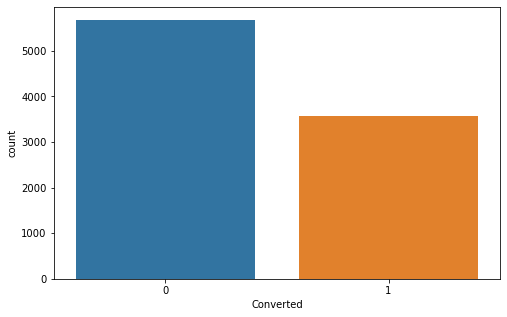

In [29]:
plt.figure(figsize = (8,5))
sns.countplot(x="Converted",  data=Leads_Conversion)
plt.show()

In [30]:
## checking the lead conversion rate

Converted = (sum(Leads_Conversion['Converted'])/len(Leads_Conversion['Converted'].index))*100
Converted

38.53896103896104

#### From the above we can see that around 38% of the leads are converted

### Visualization on the initial Leads Data  :
- data with columns inputed by sales team
- columns that had null values >50%
- 


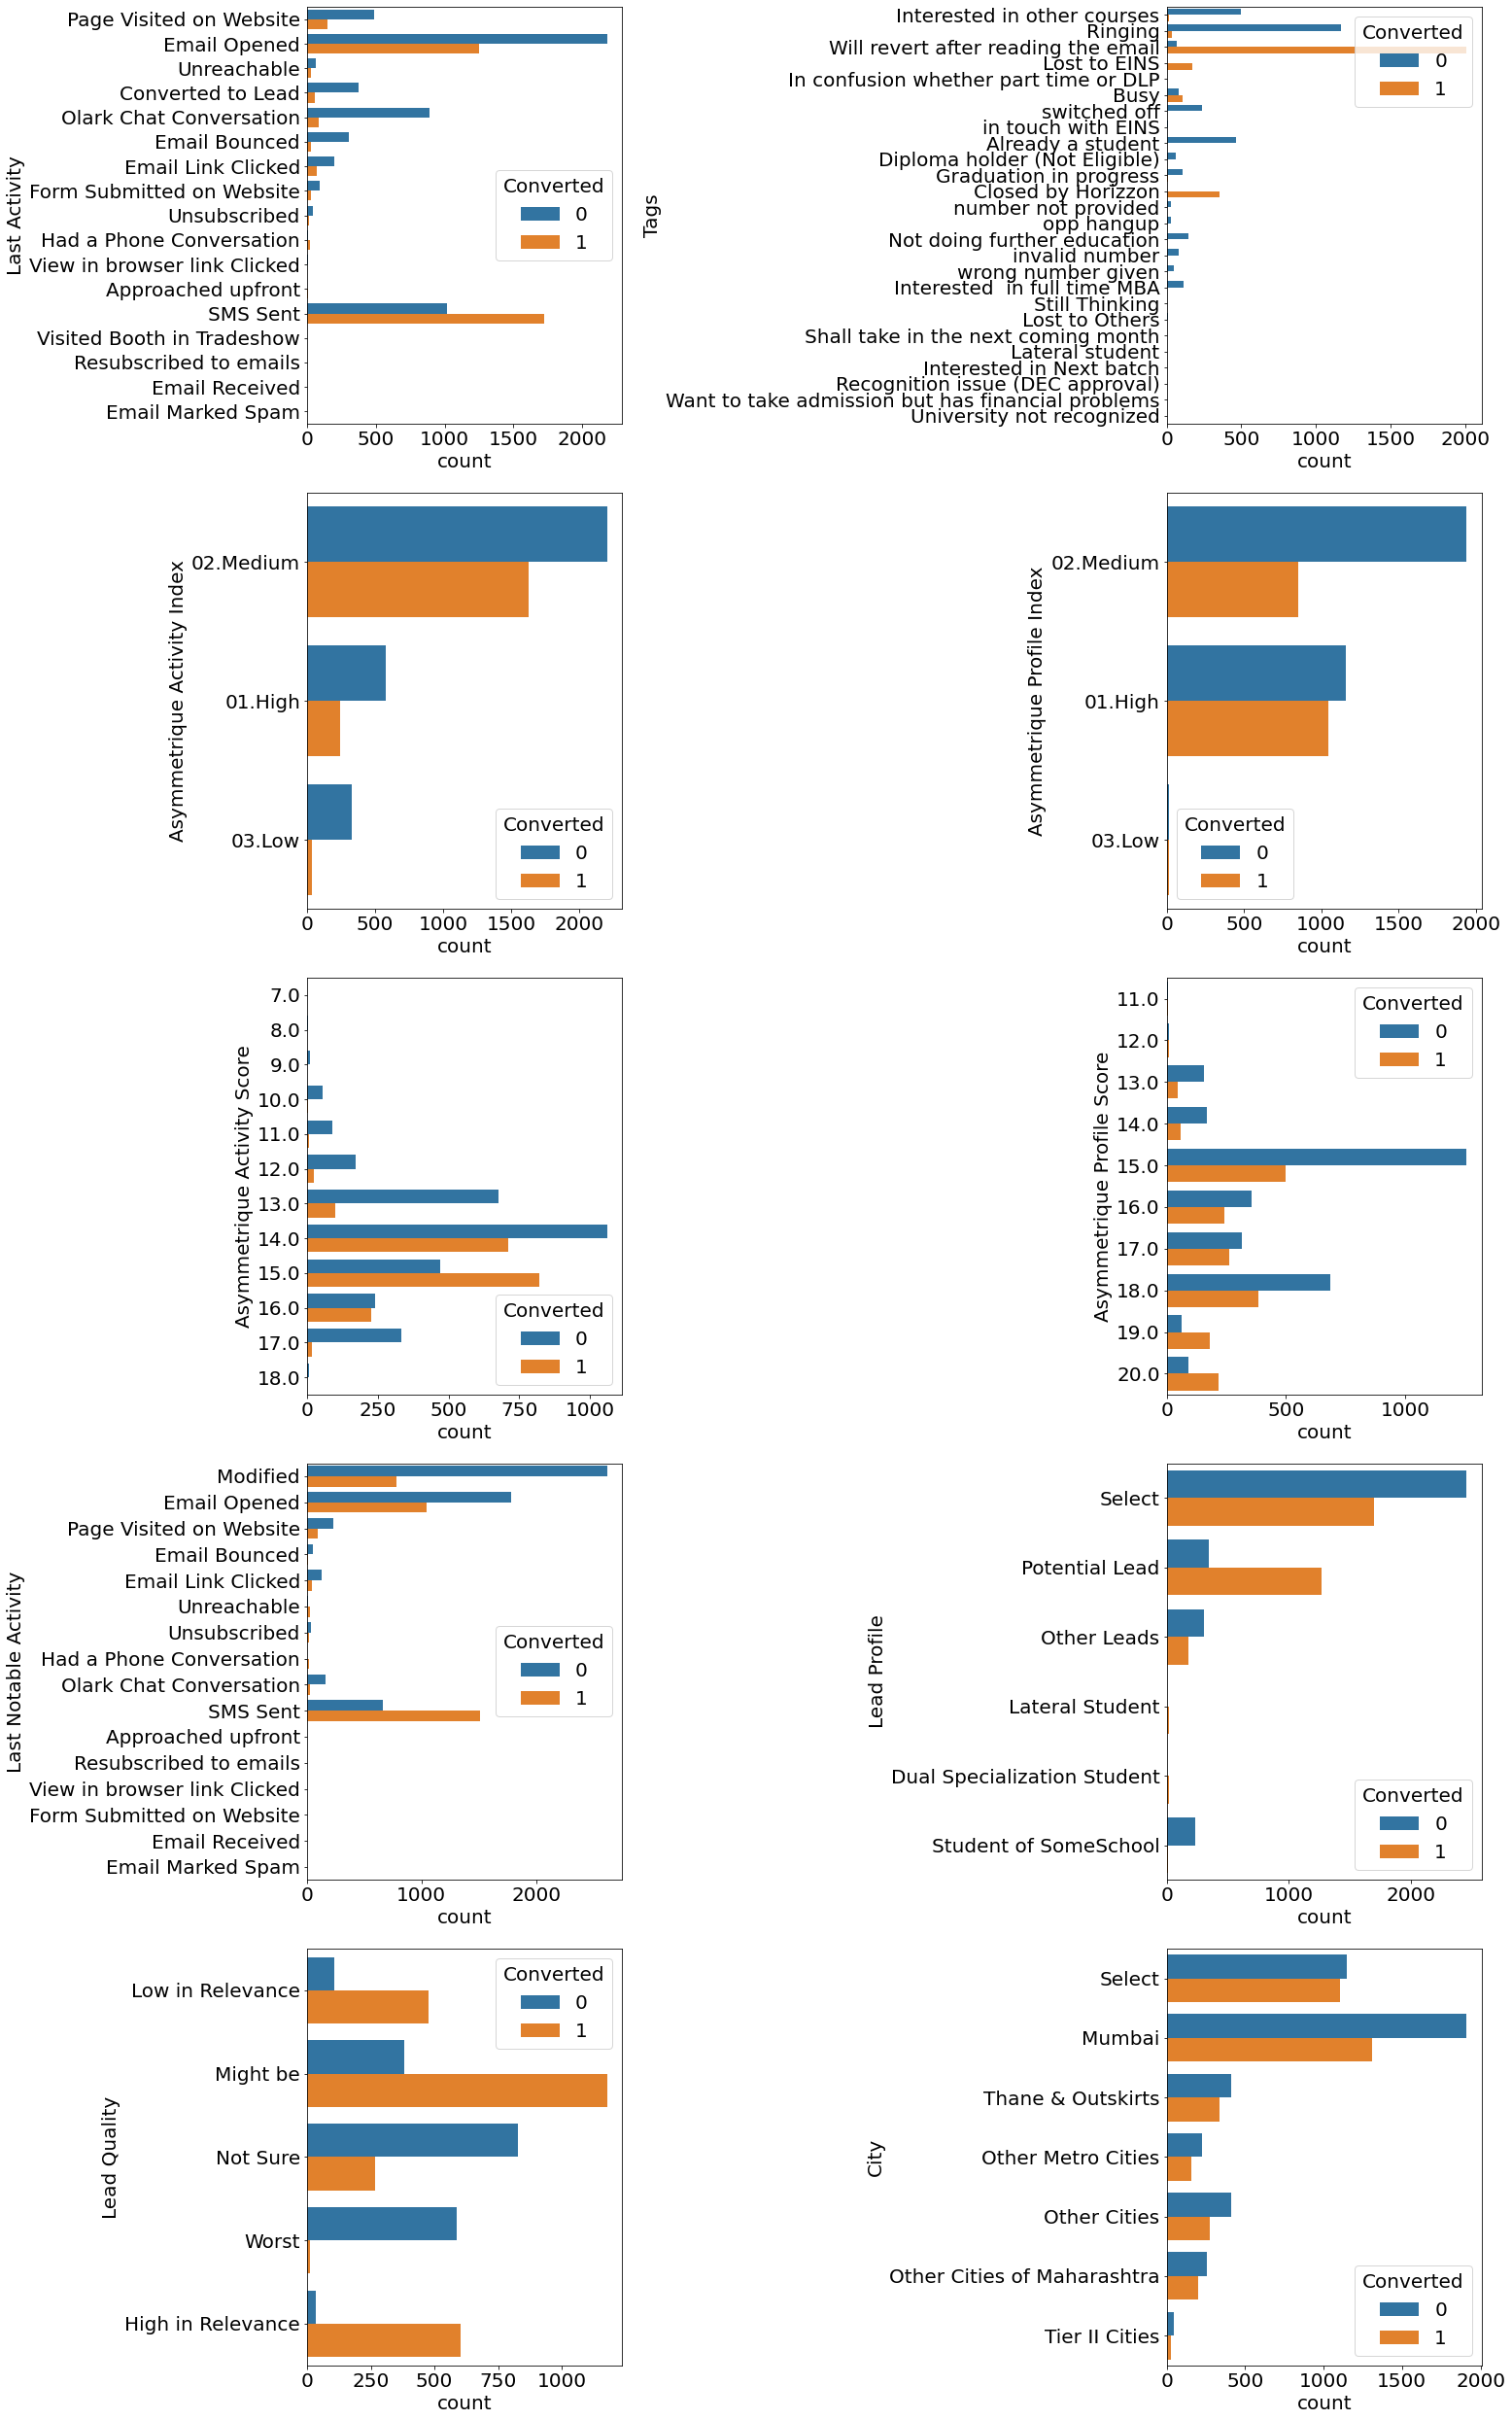

In [31]:
plt.rcParams['font.size'] = '20'
plt.figure(figsize = (22,35))
plt.subplot(5,2,1)
sns.countplot(y="Last Activity", hue="Converted", data=Leads_Conversion)
plt.subplot(5,2,2)
sns.countplot(y="Tags", hue="Converted", data=Leads_Conversion)
plt.subplot(5,2,3)
sns.countplot(y="Asymmetrique Activity Index", hue="Converted", data=Leads_Conversion)
plt.subplot(5,2,4)
sns.countplot(y="Asymmetrique Profile Index", hue="Converted", data=Leads_Conversion)
plt.subplot(5,2,5)
sns.countplot(y="Asymmetrique Activity Score", hue="Converted", data=Leads_Conversion)
plt.subplot(5,2,6)
sns.countplot(y="Asymmetrique Profile Score", hue="Converted", data=Leads_Conversion)
plt.subplot(5,2,7)
sns.countplot(y="Last Notable Activity", hue="Converted", data=Leads_Conversion)
plt.subplot(5,2,8)
sns.countplot(y="Lead Profile", hue="Converted", data=Leads_Conversion)
plt.subplot(5,2,9)
sns.countplot(y="Lead Quality", hue="Converted", data=Leads_Conversion)
plt.subplot(5,2,10)
sns.countplot(y="City", hue="Converted", data=Leads_Conversion)
plt.tight_layout()
plt.show()

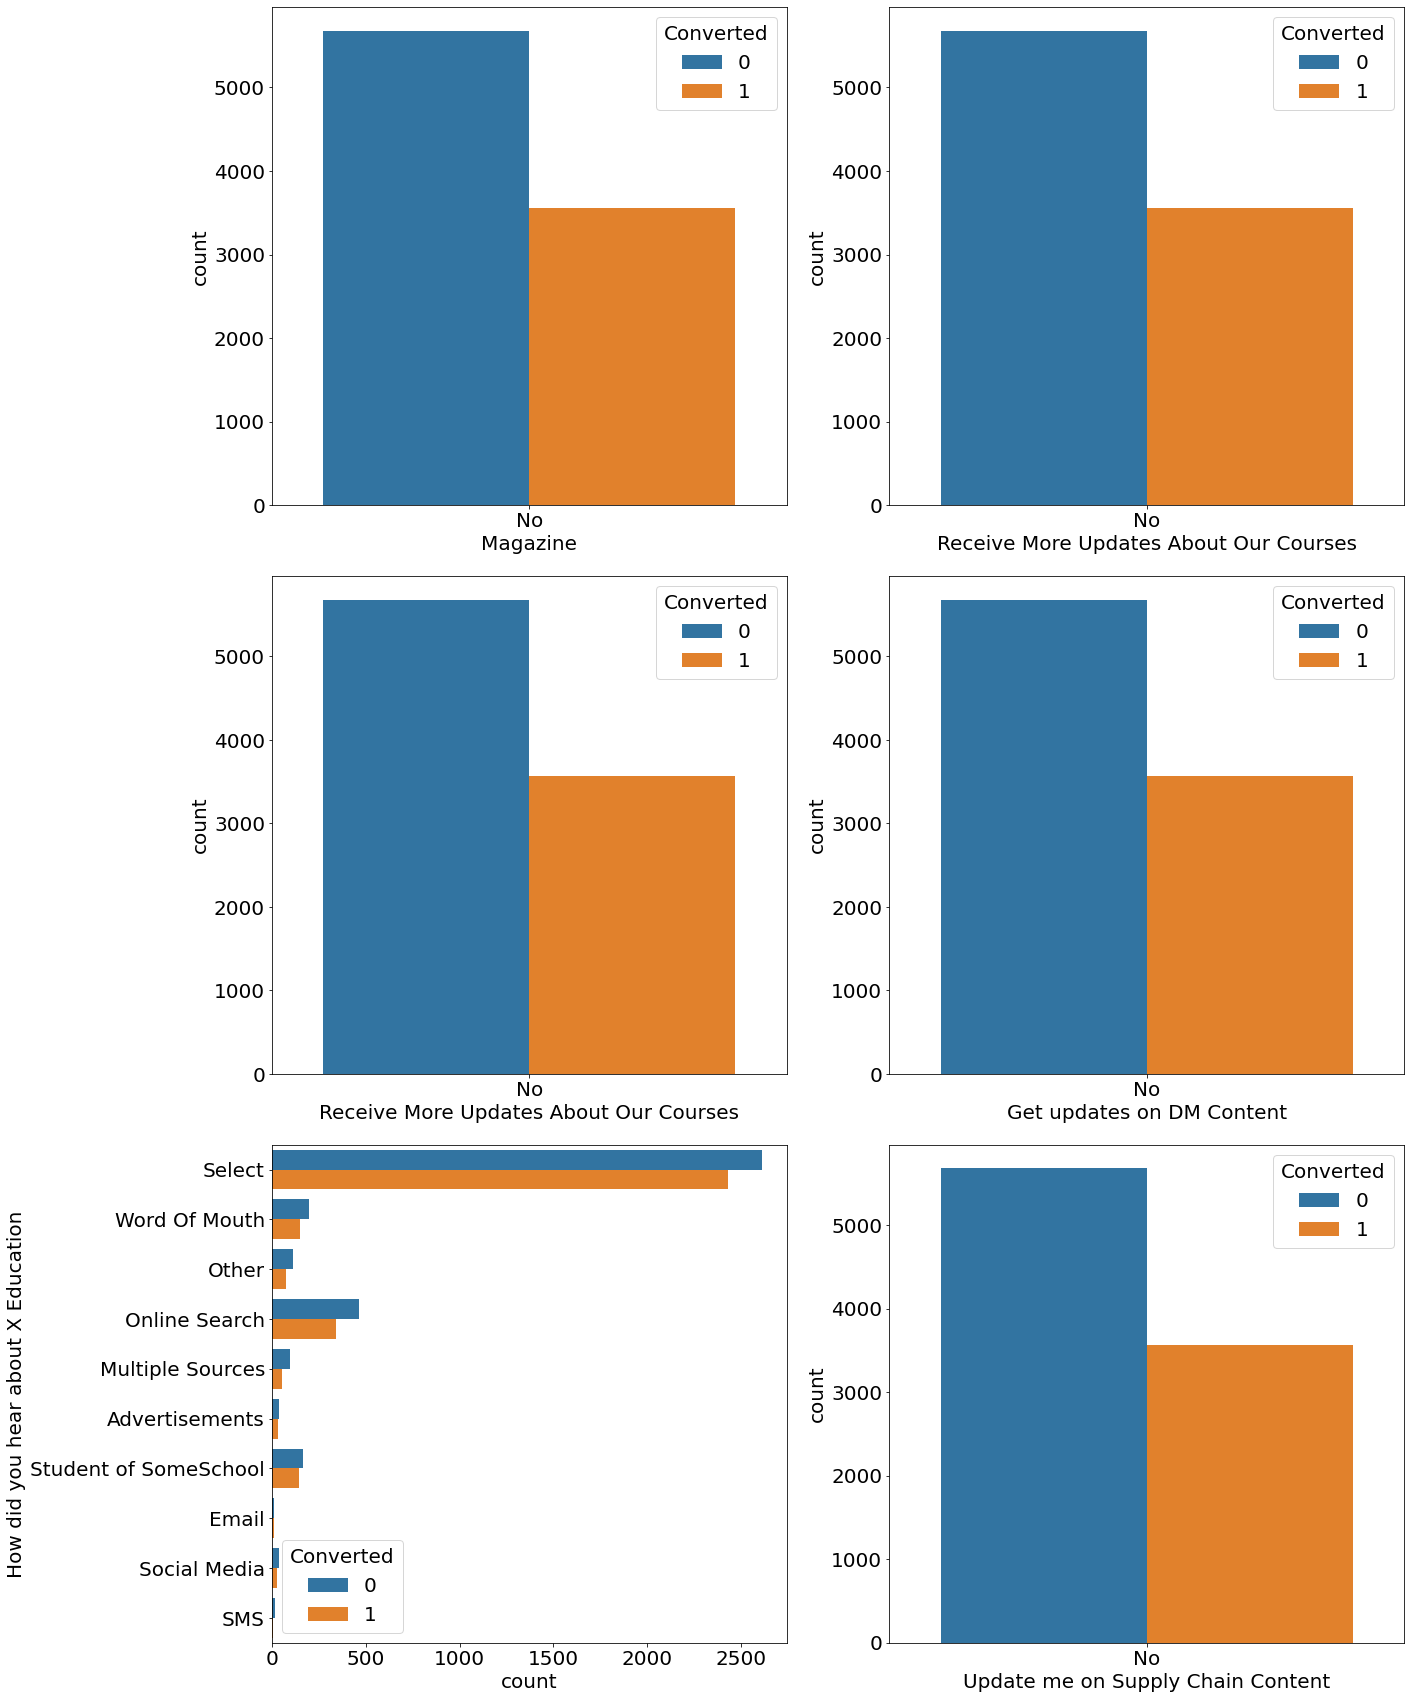

In [32]:
plt.rcParams['font.size'] = '20'
plt.figure(figsize = (20,24))
plt.subplot(3,2,1)
sns.countplot(x="Magazine", hue="Converted", data=Leads_Conversion)
plt.subplot(3,2,2)
sns.countplot(x="Receive More Updates About Our Courses", hue="Converted", data=Leads_Conversion)
plt.subplot(3,2,3)
sns.countplot(x="Receive More Updates About Our Courses", hue="Converted", data=Leads_Conversion)
plt.subplot(3,2,4)
sns.countplot(x="Get updates on DM Content", hue="Converted", data=Leads_Conversion)
plt.subplot(3,2,5)
sns.countplot(y="How did you hear about X Education", hue="Converted", data=Leads_Conversion)
plt.subplot(3,2,6)
sns.countplot(x="Update me on Supply Chain Content", hue="Converted", data=Leads_Conversion)
plt.tight_layout()
plt.show()



### Visulaization on the balance 19 columns post data cleaning and data preparation

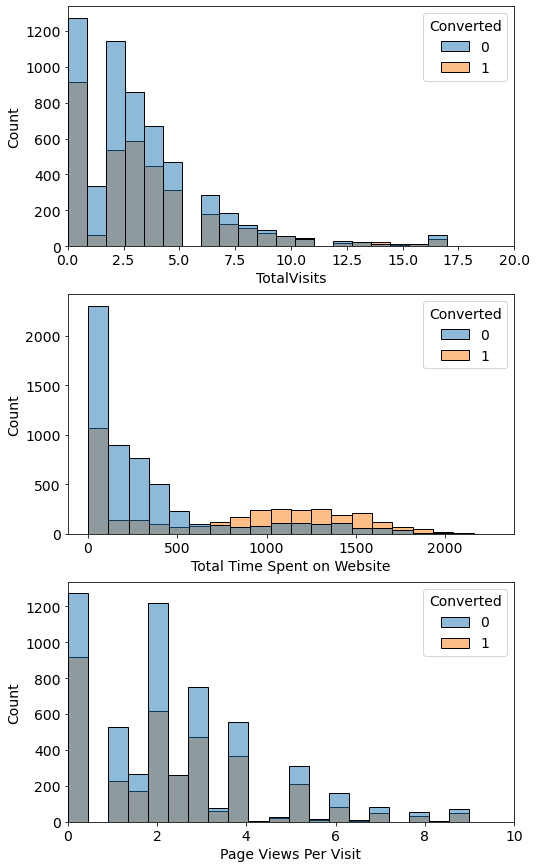

In [33]:
plt.rcParams['font.size'] = '14'
plt.figure(figsize = (8,15))
plt.subplot(3,1,1)
sns.histplot(data=LC, x="TotalVisits", bins = 20, hue="Converted" )
plt.xlim([0, 20])
plt.subplot(3,1,2)
sns.histplot(data=LC, x="Total Time Spent on Website", bins = 20, hue="Converted" )
plt.subplot(3,1,3)
sns.histplot(data=LC, x="Page Views Per Visit", bins = 20, hue="Converted" )
plt.xlim([0, 10])
plt.show()

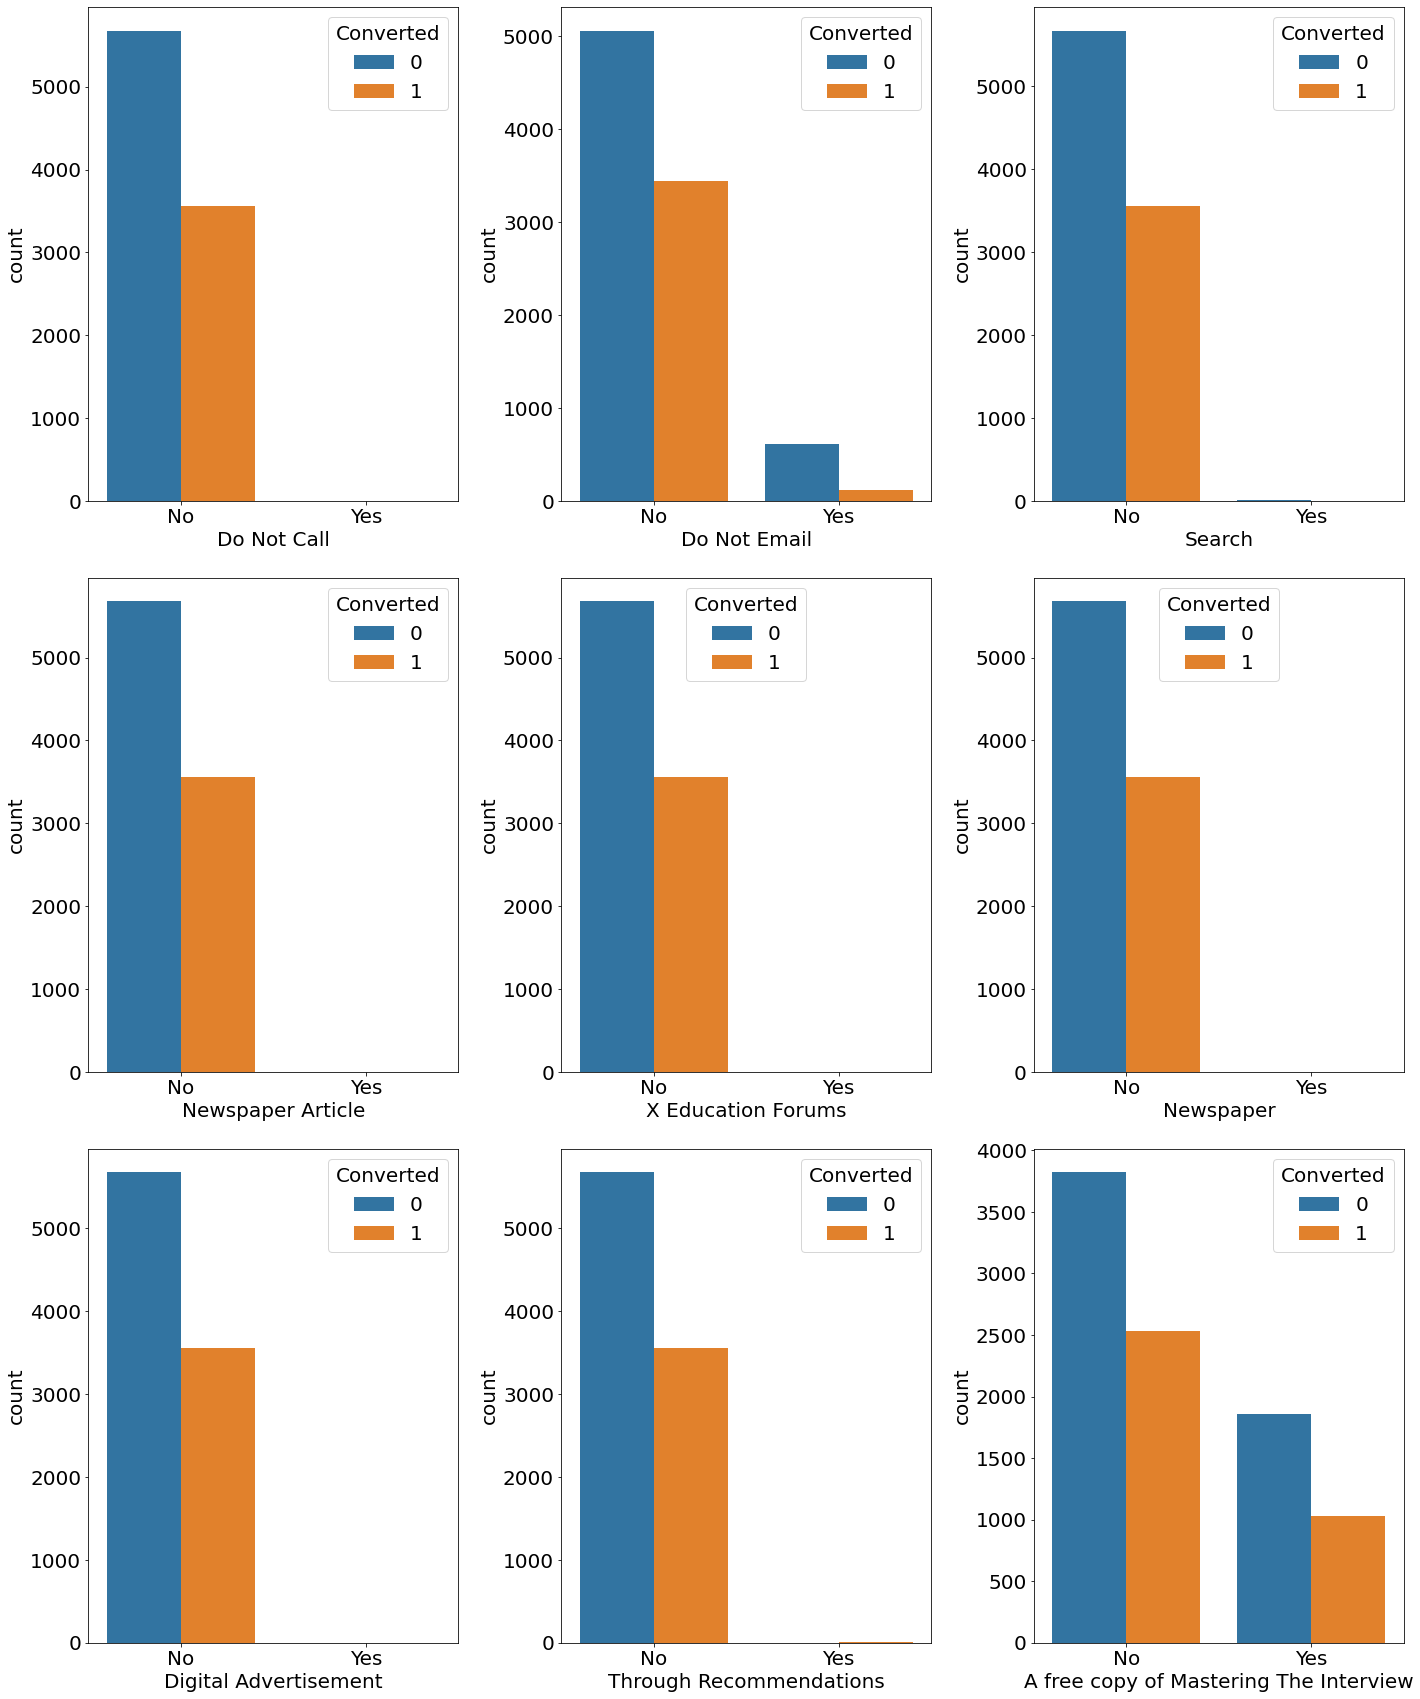

In [34]:
plt.rcParams['font.size'] = '20'
plt.figure(figsize = (20,24))
plt.subplot(3,3,1)
sns.countplot(x="Do Not Call", hue="Converted", data=LC)
plt.subplot(3,3,2)
sns.countplot(x="Do Not Email", hue="Converted", data=LC)
plt.subplot(3,3,3)
sns.countplot(x="Search", hue="Converted", data=LC)
plt.subplot(3,3,4)
sns.countplot(x="Newspaper Article", hue="Converted", data=LC)
plt.subplot(3,3,5)
sns.countplot(x="X Education Forums", hue="Converted", data=LC)
plt.subplot(3,3,6)
sns.countplot(x="Newspaper", hue="Converted", data=LC)
plt.subplot(3,3,7)
sns.countplot(x="Digital Advertisement", hue="Converted", data=LC)
plt.subplot(3,3,8)
sns.countplot(x="Through Recommendations", hue="Converted", data=LC)
plt.subplot(3,3,9)
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=LC)
plt.tight_layout()
plt.show()

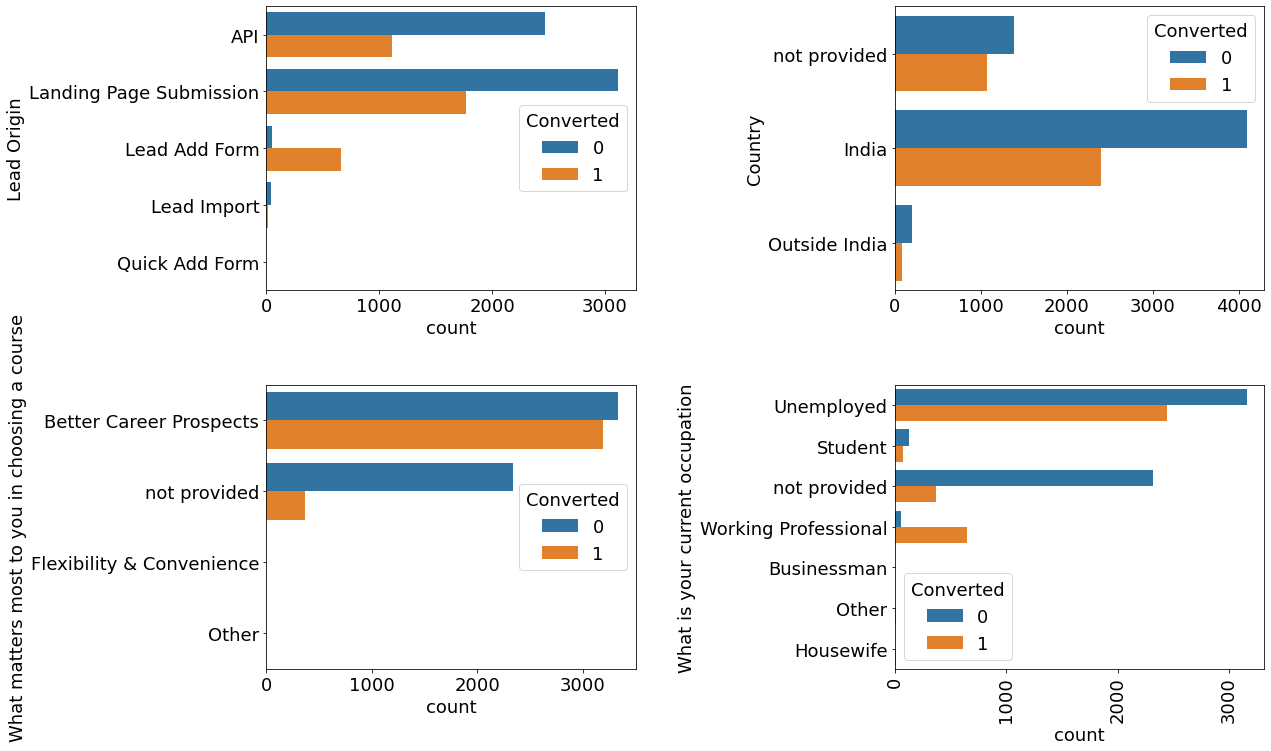

In [35]:
plt.rcParams['font.size'] = '18'
plt.figure(figsize = (18,15))
plt.subplot(3,2,1)
sns.countplot(y="Lead Origin", hue="Converted", data=LC)
plt.subplot(3,2,2)
sns.countplot(y="Country", hue="Converted", data=LC)
plt.subplot(3,2,3)
sns.countplot(y="What matters most to you in choosing a course", hue="Converted", data=LC)
plt.subplot(3,2,4)
sns.countplot(y="What is your current occupation", hue="Converted", data=LC).tick_params(axis='x', rotation = 90)
plt.tight_layout()
plt.show()

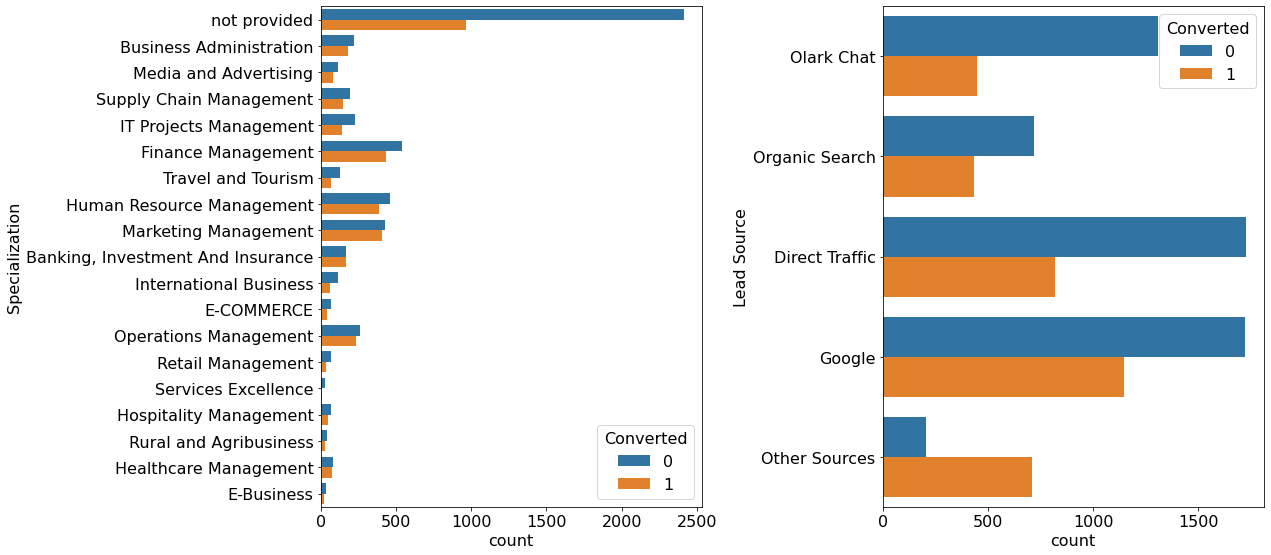

In [36]:
plt.rcParams['font.size'] = '16'
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.countplot(y="Specialization", hue="Converted", data=LC)
plt.subplot(1,2,2)
sns.countplot(y="Lead Source", hue="Converted", data=LC)
plt.tight_layout()
plt.show()

#### Converting some binary variables( Yes/No) to 1/0


In [37]:
#encoding categorical 
for values in["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","A free copy of Mastering The Interview"]:
    LC[values]=LC[values].apply(lambda x : 1 if x == "Yes" else 0)
    
LC.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,not provided,not provided,Unemployed,Better Career Prospects,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,India,not provided,Unemployed,Better Career Prospects,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,not provided,Unemployed,Better Career Prospects,0,0,0,0,0,0,0


#### Creating Dummy features for categorical vaiables with multiple levels

In [38]:
#creating the dummy variables for categorical variables and dropping the first
dum_vars =LC[['What matters most to you in choosing a course','Specialization','What is your current occupation','Country','Lead Source','Lead Origin']]
dum_vars = pd.get_dummies(dum_vars,drop_first=True )

In [39]:
#Adding the dummy variables to the dataset
LC_Final_Main = pd.concat([LC, dum_vars],axis = 1)#### Creating Dummy features for categorical vaiables with multiple levels

In [40]:
#dropping the original categorical columns for which we created dummmy features
LC_Main_Data = LC_Final_Main.drop(labels=['What matters most to you in choosing a course','Specialization','What is your current occupation','Country','Lead Source','Lead Origin'], axis=1)
LC_Main_Data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,Country_Outside India,Country_not provided,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [41]:
LC_Main_Data.shape

(9240, 50)

In [42]:
#checking for outliers in continuous variables
num_LC = LC_Main_Data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [43]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_LC.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.332747,487.698268,2.334002
std,3.228216,548.021466,1.970934
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


# Step 4:Test - Train split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Putting feature variables to X
X = LC_Main_Data.drop(['Converted'], axis = 1)
X.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,Country_Outside India,Country_not provided,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [46]:
#putting the response variable to y
y=LC_Main_Data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [47]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Step 5: Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,Country_Outside India,Country_not provided,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form
1871,0,0,-1.024240,-0.885371,-1.183319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
6795,0,0,0.203826,0.005716,-0.506086,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3516,0,0,0.510843,-0.691418,0.089676,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
8105,0,0,0.510843,1.365219,1.362671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3934,0,0,-1.024240,-0.885371,-1.183319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


In [50]:
## checking the lead conversion rate

Converted = (sum(LC_Main_Data['Converted'])/len(LC_Main_Data['Converted'].index))*100
Converted

38.53896103896104

We have almost 38% conversion rate

# Step 6: Looking at the correlations

In [51]:
LC_Main_Data.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,Country_Outside India,Country_not provided,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form
Do Not Email,1.000000,-0.004322,-0.135580,8.937794e-03,-0.046374,2.382035e-02,-0.011443,-0.004322,-0.003056,-0.003056,-0.006113,-0.008088,0.055762,-0.004322,-0.003056,0.058732,0.003893,0.012636,0.033293,-0.004597,0.013447,0.010674,-0.019910,0.069613,0.005416,-0.027271,-0.000343,-0.014036,0.023426,0.028032,0.053781,0.002680,0.059722,-0.037805,-0.009669,-0.002609,0.006225,-0.019533,-0.049841,0.049611,0.053524,-0.049338,-0.071647,-0.051436,0.034295,-0.022832,0.095304,-0.020983,-0.017529,3.541622e-02
Do Not Call,-0.004322,1.000000,0.018581,5.320492e-03,0.006801,-6.226507e-03,-0.000573,-0.000216,-0.000153,-0.000153,-0.000306,-0.000405,-0.009921,-0.000216,-0.000153,-0.009476,-0.003142,-0.001159,-0.001630,-0.005057,0.054625,-0.001645,-0.004677,-0.002988,-0.002062,0.020972,-0.002205,-0.003530,-0.001539,-0.001313,-0.000970,-0.002915,-0.002205,-0.011175,-0.000484,-0.000613,-0.002244,0.011863,-0.004232,-0.009429,-0.002634,0.007778,0.006030,-0.007125,-0.005559,0.019678,-0.015587,0.023210,-0.001139,-1.530783e-04
Converted,-0.135580,0.018581,1.000000,4.480160e-02,0.362483,-2.825390e-03,-0.002261,0.003465,-0.008238,-0.008238,-0.005789,0.018607,-0.039820,0.003465,-0.008238,-0.329252,0.025791,-0.002747,-0.006429,0.043308,0.030306,0.008190,0.047130,-0.001200,-0.007441,0.065853,0.010264,0.043272,-0.009755,0.007200,-0.014956,0.019245,-0.009457,-0.154025,0.041567,0.020505,-0.004375,0.128710,0.313837,-0.326349,-0.034105,0.064167,0.020044,-0.129459,-0.005879,0.265460,-0.051236,0.321702,-0.023695,1.313825e-02
TotalVisits,0.008938,0.005320,0.044802,1.000000e+00,0.325757,7.061510e-01,0.072700,0.044065,0.044048,0.021488,0.031701,0.048340,0.279912,-0.007596,-0.007518,-0.071888,0.064223,0.026562,0.038011,0.078198,0.051499,0.026747,0.085836,0.045417,0.053768,0.039439,0.065822,0.038809,0.046572,0.048363,0.026396,0.058539,0.098757,-0.362472,-0.008152,0.037907,-0.030567,0.072335,-0.000497,-0.071496,0.037396,-0.550197,0.176938,-0.447133,0.288824,-0.182760,0.407097,-0.232977,-0.041543,-4.684443e-18
Total Time Spent on Website,-0.046374,0.006801,0.362483,3.257573e-01,1.000000,3.387201e-01,0.012654,0.011326,0.006195,0.025142,0.007607,0.023186,0.168298,-0.009363,-0.000944,-0.150737,0.053244,0.018988,0.001162,0.074260,0.027873,0.039611,0.063852,0.032481,0.022154,0.067445,0.040589,0.060720,0.027458,0.020672,0.002900,0.049050,0.042640,-0.287133,0.007088,0.028115,-0.012518,0.086366,0.099241,-0.150718,0.026476,-0.436736,0.205604,-0.37

In [52]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(LC_Main_Data, .7)


What matters most to you in choosing a course_not provided  What is your current occupation_Unemployed     -0.798350
What is your current occupation_Unemployed                  What is your current occupation_not provided   -0.794875
Specialization_not provided                                 Lead Origin_Landing Page Submission            -0.748263
TotalVisits                                                 Page Views Per Visit                            0.706151
Newspaper Article                                           X Education Forums                              0.707069
Country_not provided                                        Lead Source_Olark Chat                          0.742487
Lead Source_Other Sources                                   Lead Origin_Lead Add Form                       0.868839
What matters most to you in choosing a course_not provided  What is your current occupation_not provided    0.995041
Do Not Email                                                Do N

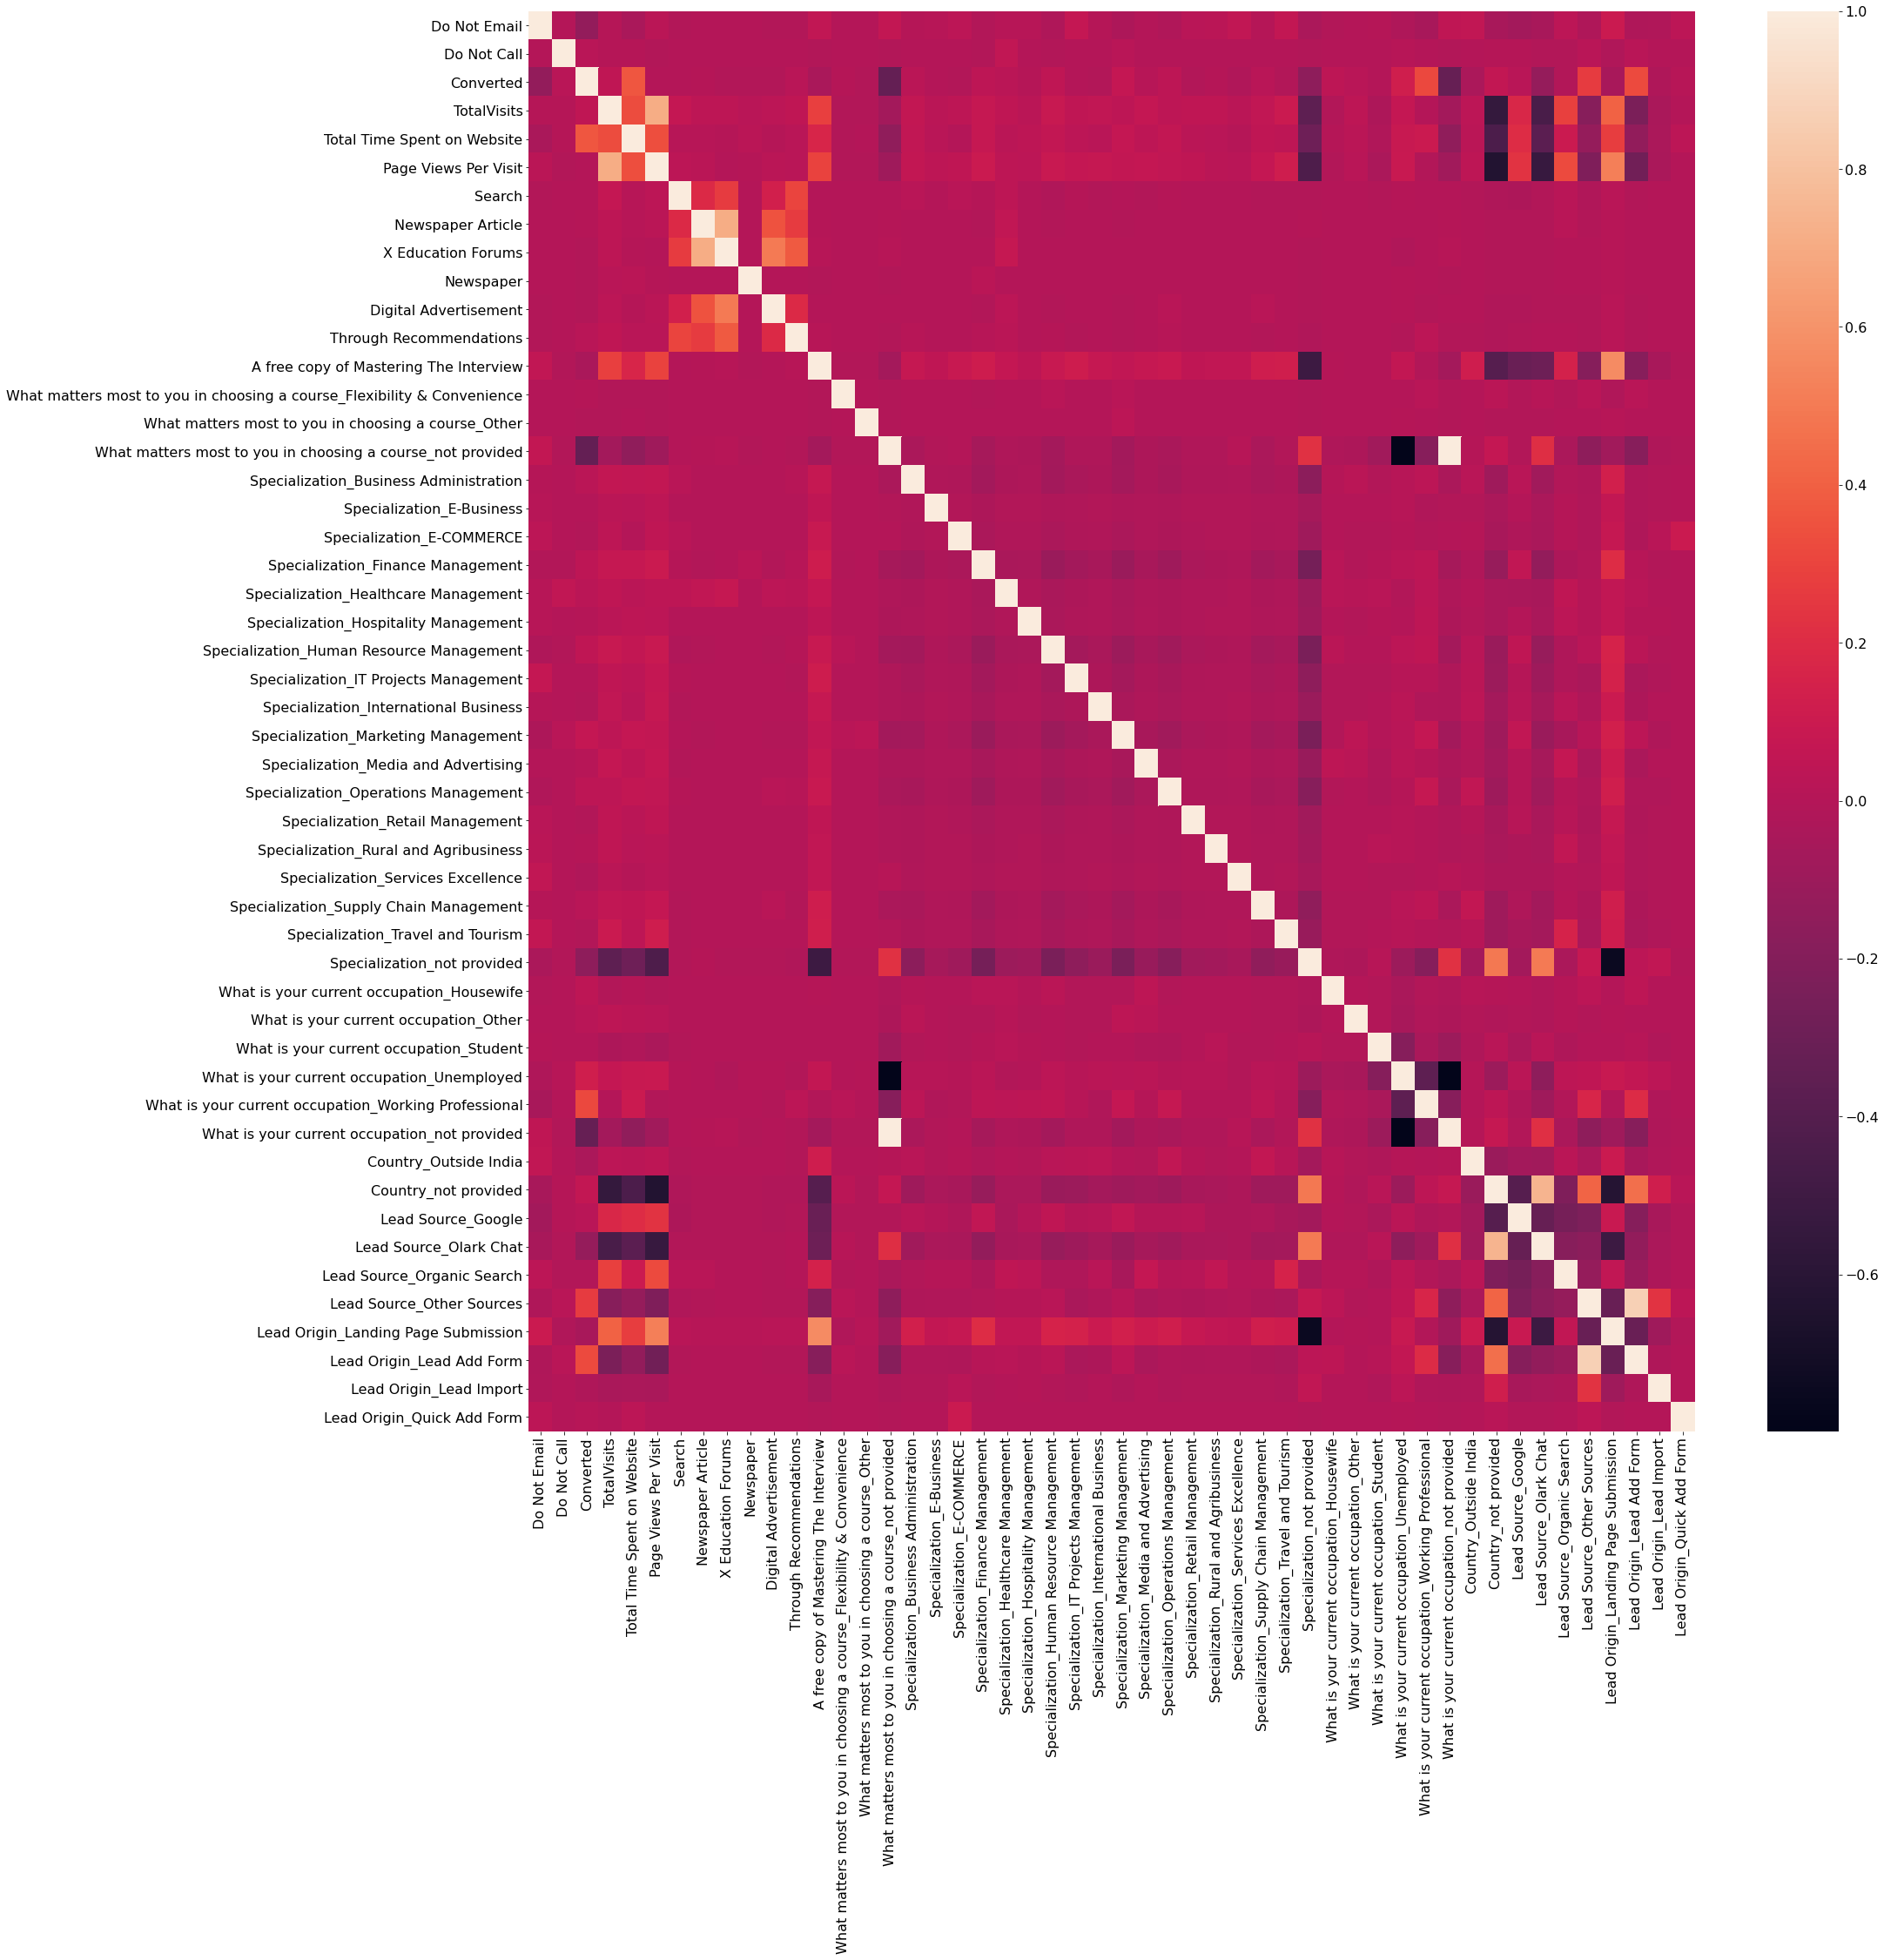

In [53]:
#Lets see the correlation matrix
plt.figure(figsize = (30,30))
sns.heatmap(LC_Main_Data.corr())
plt.show()

#### Dropping columns which are highly correlated

In [54]:
LC_Main_Data.drop(['What is your current occupation_not provided', 'What is your current occupation_Unemployed'], inplace = True, axis = 1)

In [55]:
LC_Main_Data.shape

(9240, 48)

# Step 7: Model Building

#### Running the first training model

In [56]:
import statsmodels.api as sm

### Model number 1

In [57]:
#logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2829.4
Date:                Sat, 12 Jun 2021   Deviance:                       5658.9
Time:                        22:25:35   Pearson chi2:                 8.54e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.7066      1.077     -0.656      0.512      -2.817       1.404
Do Not Email                                                               -1.2541      0.161     -7.789      0.000      -1.570      -0.939
Do Not Call                                                                20.9460   5.58e+04      0.000      1.000   -1.09e+05    1.09e+05
TotalVisits                                                                 0.2122      0.046      4.631      0.000       0.122       0.302
Total Time Spent on Website                                                 1.0958      0.039     27.948      0.000       1.019       1.173
Page Views Per Visit                                                       -0.1234      0.053     -2.331      0.020      -0.227      -0.020
Search                                                                      0.0228      0.821      0.028      0.978      -1.587       1.632
Newspaper Article                                                          24.2342   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
X Education Forums                                                        -26.6000   1.26e+05     -0.000      1.000   -2.46e+05    2.46e+05
Newspaper                                                                 -25.9214   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                                                     -21.6360   5.61e+04     -0.000      1.000    -1.1e+05     1.1e+05
Through Recommendations                                                     0.8398      1.417      0.593      0.553      -1.938       3.618
A free copy of Mastering The Interview                                     -0.1998      0.104     -1.914      0.056      -0.404       0.005
What matters most to you in choosing a course_Flexibility & Convenience    -2.8127      3.056     -0.920      0.357      -8.803       3.178
What matters most to you in choosing a course_Other                       -22.5114   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
What matters most to you in choosing a course_not provided                -21.5568   1.94e+04     -0.001      0.999   -3.81e+04    3.81e+04
Specialization_Business Administration                                     -0.2885      0.238     -1.211      0.226      -0.755       0.178
Specialization_E-Business                                                  -0.2273      0.458     -0.497      0.619      -1.124       0.670
Specialization_E-COMMERCE                                                   0.1848      0.329      0.562      0.574      -0.460       0.830
Spe

There is tremendous scope for feature elimination basis the above output. hence we will go the mixed route - automated RFE feature selection as well as manual elimination using p values and VIF

# Step 7: Feature selection using RFE

In [58]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()

In [59]:
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 22),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Search', False, 35),
 ('Newspaper Article', False, 6),
 ('X Education Forums', False, 14),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 5),
 ('Through Recommendations', False, 10),
 ('A free copy of Mastering The Interview', False, 19),
 ('What matters most to you in choosing a course_Flexibility & Convenience',
  False,
  3),
 ('What matters most to you in choosing a course_Other', False, 12),
 ('What matters most to you in choosing a course_not provided', True, 1),
 ('Specialization_Business Administration', False, 15),
 ('Specialization_E-Business', False, 21),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_Finance Management', False, 31),
 ('Specialization_Healthcare Management', False, 27),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management',

In [60]:
col = X_train.columns[rfe.support_]

In [61]:
# Columns excluded by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Speci

In [62]:
#Columns selected by RFE
X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'What matters most to you in choosing a course_not provided',
       'Specialization_Hospitality Management', 'Specialization_not provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided', 'Country_not provided',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import'],
      dtype='object')

Assessing the model with StatsModels


### Model number 2

In [63]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.7
Date:                Sat, 12 Jun 2021   Deviance:                       5719.4
Time:                        22:25:41   Pearson chi2:                 8.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.0835      0.114      0.733      0.463      -0.140       0.307
Do Not Email                                                  -1.2647      0.159     -7.970      0.000      -1.576      -0.954
Total Time Spent on Website                                    1.0946      0.039     28.304      0.000       1.019       1.170
Newspaper                                                    -25.4423   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
What matters most to you in choosing a course_not provided   -21.6381   1.94e+04     -0.001      0.999    -3.8e+04     3.8e+04
Specialization_Hospitality Management                         -1.0128      0.325     -3.121      0.002      -1.649      -0.377
Specialization_not provided                                   -0.9765      0.120     -8.111      0.000      -1.212      -0.741
What is your current occupation_Housewife                     23.2625   2.19e+04      0.001      0.999   -4.28e+04    4.29e+04
What is your current occupation_Other                         -0.9340      0.799     -1.169      0.242      -2.499       0.631
What is your current occupation_Student                       -0.0734      0.223     -0.329      0.742      -0.510       0.363
What is your current occupation_Working Professional           2.4092      0.188     12.844      0.000       2.042       2.777
What is your current occupation_not provided                  20.4567   1.94e+04      0.001      0.999    -3.8e+04     3.8e+04
Country_not provided                                           0.9613      0.114      8.459      0.000       0.739       1.184
Lead Origin_Landing Page Submission                           -0.8673      0.119     -7.290      0.000      -1.100      -0.634
Lead Origin_Lead Add Form                                      2.6088      0.189     13.796      0.000       2.238       2.979
Lead Origin_Lead Import                                       -1.4733      0.536     -2.749      0.006      -2.524      -0.423
==============================================================================================================================
"""

In [64]:
#Getting the predicted values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.518918
6795    0.147541
3516    0.334362
8105    0.670528
3934    0.288883
4844    0.975023
3297    0.170425
8071    0.996910
987     0.196035
7423    0.780446
dtype: float64

In [65]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.51891847, 0.14754061, 0.33436223, 0.67052846, 0.28888277,
       0.9750228 , 0.1704252 , 0.99691028, 0.1960347 , 0.78044607])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [66]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Cust_ID']= y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID
0,0,0.518918,1871
1,0,0.147541,6795
2,0,0.334362,3516
3,0,0.670528,8105
4,0,0.288883,3934


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [67]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID,predicted
0,0,0.518918,1871,1
1,0,0.147541,6795,0
2,0,0.334362,3516,0
3,0,0.670528,8105,1
4,0,0.288883,3934,0


In [68]:
from sklearn import metrics

In [69]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3575  427]
 [ 810 1656]]


    
    Predicted        not_Converted    Converted
    Actual
    not_Converted       3575          427
    Converted            810         1656

In [70]:
#Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8087507730364873


Accuracy of 81% is a reasonable metrics

In [71]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What matters most to you in choosing a course_...,156.82
10,What is your current occupation_not provided,155.96
11,Country_not provided,2.81
5,Specialization_not provided,2.11
13,Lead Origin_Lead Add Form,1.56
12,Lead Origin_Landing Page Submission,1.38
1,Total Time Spent on Website,1.26
9,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.12
8,What is your current occupation_Student,1.08


#### Very high VIF values visible for the following 2 columns :
- What is your current occupation_not provided
- What matters most to you in choosing a course_not provided

Since the column 'Newspaper' has very high p value of 1.000, we are dropping it even though its VIF is good

In [73]:
col = col.drop('Newspaper')

### Model number 3

In [74]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.7
Date:                Sat, 12 Jun 2021   Deviance:                       5723.5
Time:                        22:25:43   Pearson chi2:                 8.83e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.0839      0.114      0.736      0.461      -0.139       0.307
Do Not Email                                                  -1.2632      0.159     -7.963      0.000      -1.574      -0.952
Total Time Spent on Website                                    1.0919      0.039     28.271      0.000       1.016       1.168
What matters most to you in choosing a course_not provided   -21.6393   1.94e+04     -0.001      0.999    -3.8e+04     3.8e+04
Specialization_Hospitality Management                         -1.0101      0.324     -3.114      0.002      -1.646      -0.374
Specialization_not provided                                   -0.9764      0.120     -8.112      0.000      -1.212      -0.740
What is your current occupation_Housewife                     23.2629   2.19e+04      0.001      0.999   -4.28e+04    4.29e+04
What is your current occupation_Other                         -0.9307      0.799     -1.165      0.244      -2.496       0.635
What is your current occupation_Student                       -0.0723      0.223     -0.325      0.746      -0.509       0.364
What is your current occupation_Working Professional           2.4103      0.188     12.852      0.000       2.043       2.778
What is your current occupation_not provided                  20.4594   1.94e+04      0.001      0.999    -3.8e+04     3.8e+04
Country_not provided                                           0.9581      0.114      8.436      0.000       0.735       1.181
Lead Origin_Landing Page Submission                           -0.8687      0.119     -7.304      0.000      -1.102      -0.636
Lead Origin_Lead Add Form                                      2.6090      0.189     13.799      0.000       2.238       2.980
Lead Origin_Lead Import                                       -1.4713      0.536     -2.747      0.006      -2.521      -0.421
==============================================================================================================================
"""

In [75]:
#Getting the predicted values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.518787
6795    0.147429
3516    0.334167
8105    0.669503
3934    0.288808
4844    0.974904
3297    0.170552
8071    0.996908
987     0.196108
7423    0.779636
dtype: float64

In [76]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.51878728, 0.14742943, 0.33416728, 0.66950264, 0.28880813,
       0.97490433, 0.17055217, 0.99690773, 0.19610764, 0.77963586])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [77]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Cust_ID']= y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID
0,0,0.518787,1871
1,0,0.147429,6795
2,0,0.334167,3516
3,0,0.669503,8105
4,0,0.288808,3934


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [78]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID,predicted
0,0,0.518787,1871,1
1,0,0.147429,6795,0
2,0,0.334167,3516,0
3,0,0.669503,8105,1
4,0,0.288808,3934,0


In [79]:
from sklearn import metrics

In [80]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3574  428]
 [ 811 1655]]


                       Predicted     
                    not_Converted    Converted
      Actual
      not_Converted      3574          428
      Converted           811         1655

In [81]:
#Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8084415584415584


In [82]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,What matters most to you in choosing a course_...,156.82
9,What is your current occupation_not provided,155.96
10,Country_not provided,2.81
4,Specialization_not provided,2.11
12,Lead Origin_Lead Add Form,1.56
11,Lead Origin_Landing Page Submission,1.38
1,Total Time Spent on Website,1.25
8,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.12
7,What is your current occupation_Student,1.08


In [83]:
# Dropping "What matters most to you in choosing a course_not provided" due to its high p value and high VIF
col= col.drop('What matters most to you in choosing a course_not provided')

### Model number 4

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2863.7
Date:                Sat, 12 Jun 2021   Deviance:                       5727.4
Time:                        22:25:45   Pearson chi2:                 8.83e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1023      0.113      0.902      0.367      -0.120       0.324
Do Not Email                                            -1.2813      0.158     -8.100      0.000      -1.591      -0.971
Total Time Spent on Website                              1.0929      0.039     28.299      0.000       1.017       1.169
Specialization_Hospitality Management                   -1.0100      0.325     -3.112      0.002      -1.646      -0.374
Specialization_not provided                             -1.0007      0.119     -8.377      0.000      -1.235      -0.767
What is your current occupation_Housewife               22.2615   1.32e+04      0.002      0.999   -2.59e+04     2.6e+04
What is your current occupation_Other                   -0.9335      0.800     -1.167      0.243      -2.501       0.634
What is your current occupation_Student                 -0.1025      0.221     -0.464      0.642      -0.535       0.330
What is your current occupation_Working Professional     2.3834      0.185     12.900      0.000       2.021       2.746
What is your current occupation_not provided            -1.1782      0.083    -14.114      0.000      -1.342      -1.015
Country_not provided                                     0.9636      0.114      8.481      0.000       0.741       1.186
Lead Origin_Landing Page Submission                     -0.8880      0.118     -7.502      0.000      -1.120      -0.656
Lead Origin_Lead Add Form                                2.6074      0.189     13.780      0.000       2.237       2.978
Lead Origin_Lead Import                                 -1.4786      0.536     -2.760      0.006      -2.529      -0.429
========================================================================================================================
"""

In [85]:
#Getting the predicted values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.524530
6795    0.144287
3516    0.333926
8105    0.669600
3934    0.288546
4844    0.974263
3297    0.170316
8071    0.996893
987     0.195543
7423    0.778965
dtype: float64

In [86]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52453023, 0.14428688, 0.33392637, 0.66960003, 0.28854557,
       0.97426306, 0.17031556, 0.99689294, 0.19554285, 0.77896451])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [87]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Cust_ID']= y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID
0,0,0.524530,1871
1,0,0.144287,6795
2,0,0.333926,3516
3,0,0.669600,8105
4,0,0.288546,3934


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID,predicted
0,0,0.524530,1871,1
1,0,0.144287,6795,0
2,0,0.333926,3516,0
3,0,0.669600,8105,1
4,0,0.288546,3934,0


In [89]:
from sklearn import metrics

In [90]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3574  428]
 [ 813 1653]]


    Predicted     not_Converted    Converted
    Actual
    not_Converted       3574         428
    Converted            813        1653

In [91]:
#Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8081323438466296


In [92]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Country_not provided,2.80
3,Specialization_not provided,2.10
8,What is your current occupation_not provided,1.59
11,Lead Origin_Lead Add Form,1.56
10,Lead Origin_Landing Page Submission,1.38
1,Total Time Spent on Website,1.25
7,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.11
6,What is your current occupation_Student,1.04
12,Lead Origin_Lead Import,1.03


In [93]:
# Dropping "What is your current occupation_Housewife" due to its high p value 
col= col.drop('What is your current occupation_Housewife')

### Model number 5

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2868.5
Date:                Sat, 12 Jun 2021   Deviance:                       5736.9
Time:                        22:25:46   Pearson chi2:                 8.86e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1064      0.113      0.940      0.347      -0.116       0.328
Do Not Email                                            -1.2856      0.158     -8.127      0.000      -1.596      -0.976
Total Time Spent on Website                              1.0921      0.039     28.300      0.000       1.016       1.168
Specialization_Hospitality Management                   -1.0146      0.325     -3.126      0.002      -1.651      -0.378
Specialization_not provided                             -1.0035      0.119     -8.405      0.000      -1.237      -0.769
What is your current occupation_Other                   -0.9376      0.800     -1.172      0.241      -2.505       0.630
What is your current occupation_Student                 -0.1063      0.221     -0.481      0.630      -0.539       0.327
What is your current occupation_Working Professional     2.3780      0.185     12.872      0.000       2.016       2.740
What is your current occupation_not provided            -1.1812      0.083    -14.154      0.000      -1.345      -1.018
Country_not provided                                     0.9618      0.114      8.470      0.000       0.739       1.184
Lead Origin_Landing Page Submission                     -0.8854      0.118     -7.485      0.000      -1.117      -0.654
Lead Origin_Lead Add Form                                2.6152      0.189     13.833      0.000       2.245       2.986
Lead Origin_Lead Import                                 -1.4786      0.536     -2.760      0.006      -2.529      -0.429
========================================================================================================================
"""

In [95]:
#Getting the predicted values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.525309
6795    0.144776
3516    0.333954
8105    0.670834
3934    0.288606
4844    0.974255
3297    0.171369
8071    0.996908
987     0.195194
7423    0.778892
dtype: float64

In [96]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52530913, 0.14477641, 0.33395379, 0.67083424, 0.28860613,
       0.97425467, 0.17136931, 0.99690791, 0.1951943 , 0.77889166])

In [97]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Cust_ID']= y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID
0,0,0.525309,1871
1,0,0.144776,6795
2,0,0.333954,3516
3,0,0.670834,8105
4,0,0.288606,3934


In [98]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID,predicted
0,0,0.525309,1871,1
1,0,0.144776,6795,0
2,0,0.333954,3516,0
3,0,0.670834,8105,1
4,0,0.288606,3934,0


In [99]:
from sklearn import metrics

In [100]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3573  429]
 [ 814 1652]]


                           Predicted     
                    not_Converted    Converted
      Actual
      not_Converted      3573          429
      Converted           814         1652

In [101]:
#Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8078231292517006


In [102]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Country_not provided,2.80
3,Specialization_not provided,2.10
7,What is your current occupation_not provided,1.59
10,Lead Origin_Lead Add Form,1.56
9,Lead Origin_Landing Page Submission,1.37
1,Total Time Spent on Website,1.25
6,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.11
5,What is your current occupation_Student,1.04
11,Lead Origin_Lead Import,1.03


In [103]:
# Dropping "What is your current occupation_Student" due to its high p value 
col= col.drop('What is your current occupation_Student')

### Model number 6

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2868.6
Date:                Sat, 12 Jun 2021   Deviance:                       5737.2
Time:                        22:25:48   Pearson chi2:                 8.86e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1042      0.113      0.921      0.357      -0.118       0.326
Do Not Email                                            -1.2855      0.158     -8.129      0.000      -1.595      -0.976
Total Time Spent on Website                              1.0922      0.039     28.305      0.000       1.017       1.168
Specialization_Hospitality Management                   -1.0160      0.325     -3.130      0.002      -1.652      -0.380
Specialization_not provided                             -1.0046      0.119     -8.418      0.000      -1.238      -0.771
What is your current occupation_Other                   -0.9349      0.800     -1.169      0.242      -2.502       0.633
What is your current occupation_Working Professional     2.3811      0.185     12.896      0.000       2.019       2.743
What is your current occupation_not provided            -1.1775      0.083    -14.168      0.000      -1.340      -1.015
Country_not provided                                     0.9601      0.113      8.460      0.000       0.738       1.182
Lead Origin_Landing Page Submission                     -0.8862      0.118     -7.494      0.000      -1.118      -0.654
Lead Origin_Lead Add Form                                2.6177      0.189     13.851      0.000       2.247       2.988
Lead Origin_Lead Import                                 -1.4745      0.536     -2.753      0.006      -2.524      -0.425
========================================================================================================================
"""

In [105]:
#Getting the predicted values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.524296
6795    0.144266
3516    0.332817
8105    0.670195
3934    0.287552
4844    0.974262
3297    0.170923
8071    0.996913
987     0.195258
7423    0.778358
dtype: float64

In [106]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52429558, 0.14426577, 0.33281704, 0.67019471, 0.28755237,
       0.9742618 , 0.17092334, 0.99691321, 0.19525757, 0.77835798])

In [107]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Cust_ID']= y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID
0,0,0.524296,1871
1,0,0.144266,6795
2,0,0.332817,3516
3,0,0.670195,8105
4,0,0.287552,3934


In [108]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID,predicted
0,0,0.524296,1871,1
1,0,0.144266,6795,0
2,0,0.332817,3516,0
3,0,0.670195,8105,1
4,0,0.287552,3934,0


In [109]:
from sklearn import metrics

In [110]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3574  428]
 [ 813 1653]]


                             Predicted     
                    not_Converted    Converted
      Actual
      not_Converted      3574          428
      Converted           813         1653

In [111]:
#Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8081323438466296


In [112]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Country_not provided,2.79
3,Specialization_not provided,2.08
6,What is your current occupation_not provided,1.57
9,Lead Origin_Lead Add Form,1.56
8,Lead Origin_Landing Page Submission,1.35
1,Total Time Spent on Website,1.25
5,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.11
10,Lead Origin_Lead Import,1.03
2,Specialization_Hospitality Management,1.02


In [113]:
# Dropping "What is your current occupation_Other" due to its high p value 
col= col.drop('What is your current occupation_Other')

### Model number 7

In [114]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2869.3
Date:                Sat, 12 Jun 2021   Deviance:                       5738.6
Time:                        22:25:50   Pearson chi2:                 8.86e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0995      0.113      0.880      0.379      -0.122       0.321
Do Not Email                                            -1.2893      0.158     -8.147      0.000      -1.599      -0.979
Total Time Spent on Website                              1.0906      0.039     28.297      0.000       1.015       1.166
Specialization_Hospitality Management                   -1.0127      0.325     -3.121      0.002      -1.649      -0.377
Specialization_not provided                             -1.0014      0.119     -8.392      0.000      -1.235      -0.768
What is your current occupation_Working Professional     2.3834      0.185     12.911      0.000       2.022       2.745
What is your current occupation_not provided            -1.1754      0.083    -14.149      0.000      -1.338      -1.013
Country_not provided                                     0.9599      0.113      8.461      0.000       0.738       1.182
Lead Origin_Landing Page Submission                     -0.8833      0.118     -7.469      0.000      -1.115      -0.652
Lead Origin_Lead Add Form                                2.6194      0.189     13.859      0.000       2.249       2.990
Lead Origin_Lead Import                                 -1.4725      0.535     -2.750      0.006      -2.522      -0.423
========================================================================================================================
"""

In [115]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Country_not provided,2.79
3,Specialization_not provided,2.08
5,What is your current occupation_not provided,1.57
8,Lead Origin_Lead Add Form,1.56
7,Lead Origin_Landing Page Submission,1.35
1,Total Time Spent on Website,1.25
4,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.11
9,Lead Origin_Lead Import,1.03
2,Specialization_Hospitality Management,1.02


All the above variables have a good p value - either 0 or close to 0 and VIF under 3. Henec we need not drop any more variables and this model seems to be good for further predictions.

We will finalise Model number 7 as our final model on which we will carry out further analysis.

In [116]:
#Getting the predicted values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.523451
6795    0.144441
3516    0.332709
8105    0.669335
3934    0.287514
4844    0.974204
3297    0.170833
8071    0.996912
987     0.195224
7423    0.777585
dtype: float64

In [117]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52345064, 0.14444127, 0.33270884, 0.6693353 , 0.2875141 ,
       0.97420363, 0.17083261, 0.99691219, 0.19522396, 0.77758507])

In [118]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Cust_ID']= y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID
0,0,0.523451,1871
1,0,0.144441,6795
2,0,0.332709,3516
3,0,0.669335,8105
4,0,0.287514,3934


In [119]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID,predicted
0,0,0.523451,1871,1
1,0,0.144441,6795,0
2,0,0.332709,3516,0
3,0,0.669335,8105,1
4,0,0.287514,3934,0


In [120]:
from sklearn import metrics

In [121]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3572  430]
 [ 812 1654]]


                         Predicted     
                    not_Converted    Converted
      Actual
      not_Converted      3572          430
      Converted           812         1654

In [122]:
#Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8079777365491652


#### Metrics beyond simply accuracy - Senstivity & Specificity

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Let us see the Sensitivity of our Logistics regression model
TP/float(TP+FN)

0.6707218167072182

The sensitivity output of 67% above means that the model has predicted 67% correct converted values.

In [125]:
# Calculating Specificity
TN/float(TN+FP)

0.8925537231384307

The specificity of 89% above reflects that the model has been able to identify 89% of the not converted cases , which is good

In [126]:
# Calculating the false positive rate predicting the conversion when the lead does not convert
print(FP/float(TN+FP))

0.10744627686156921


In [127]:
# Positive predictive value
print(TP/float(TP+FP))

0.7936660268714012


In [128]:
# Negative predictive value
print(TN/float(TN+FN))

0.8147810218978102


The Positive predictive value and Negative predictive value from the model are reflecting good percentage

In our model we have used .5 as the optimum cut off probability. Now we will plot the ROC  curve and find the optimal cut off probabilty basis which we will recalculate the key metrics of Accuracy , Senstivity and Specificity

# Step 8: Plotting the ROC curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

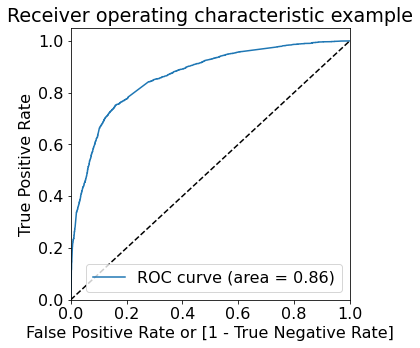

In [131]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

With ROC Area Under The Curve as .86 , our model seems to be doing a good job

# Step 9 : Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.523451,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.144441,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.332709,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.669335,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.287514,3934,0,1,1,1,0,0,0,0,0,0,0


In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.522882  0.981346  0.240380
0.2   0.2  0.702536  0.900243  0.580710
0.3   0.3  0.792208  0.774534  0.803098
0.4   0.4  0.808442  0.724655  0.860070
0.5   0.5  0.807978  0.670722  0.892554
0.6   0.6  0.792053  0.586375  0.918791
0.7   0.7  0.768398  0.486618  0.942029
0.8   0.8  0.743197  0.377129  0.968766
0.9   0.9  0.702536  0.236821  0.989505


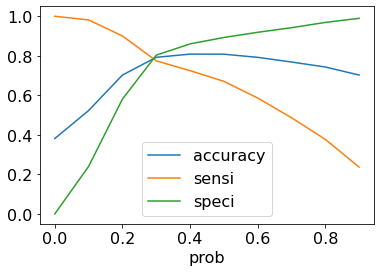

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.285 is the optimum point to take it as a cutoff probability.

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.285 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Cust_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.523451,1871,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.144441,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.332709,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.669335,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.287514,3934,0,1,1,1,0,0,0,0,0,0,0,1


In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7665429808286951

In [137]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2881, 1121],
       [ 389, 2077]], dtype=int64)

                             Predicted     
                    not_Converted    Converted
      Actual
      not_Converted      2881         1121
      Converted           389         2077

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8422546634225466

The senstivity of the model has improved from 67% ( when we had taken the cutoff probability of >.5) to 84% ( post plotting the accuracy , senstivity and specificity probabilities and getting >.285 as the optimum cut off probability). 
This is a very good senstivity percentage

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.7198900549725138

In [141]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.28010994502748626


In [142]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6494684177611006


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.881039755351682


## Precision & Recall

#Looking at the confusion matrix again

In [144]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[2881, 1121],
       [ 389, 2077]], dtype=int64)

### Precision

In [145]:
TP / TP + FP

1122.0

In [146]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6494684177611006

around 65% precision means that the predicted probability of "Converted" target variable actually being "Converted "is 65%

### Recall

In [147]:
TP / TP + FN

390.0

In [148]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8422546634225466

#### Using sklearn utilities for the same

In [149]:
from sklearn.metrics import precision_score, recall_score

In [150]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6494684177611006

In [151]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8422546634225466

Of all the Converted leads , the model could get 84% right

#### Precision and recall tradeoff

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      1
 53      1
 54      1
 55      0
 56      1
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      1
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      1
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      1
 89      1
 90      1

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

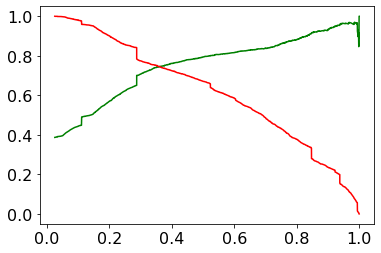

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 10: Making predictions on the test set

In [156]:

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])


In [157]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Specialization_Hospitality Management,Specialization_not provided,What is your current occupation_Working Professional,What is your current occupation_not provided,Country_not provided,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
4269,0,0.964504,0,1,0,1,0,0,0,0
2376,0,-0.885371,0,1,0,0,1,0,1,0
7766,0,-0.777416,0,0,1,0,0,0,0,0
9199,0,-0.885371,0,1,0,0,1,0,0,0
4359,0,-0.885371,0,0,0,0,1,0,1,0


In [158]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [159]:
y_test_pred = res.predict(X_test_sm)

In [160]:
y_test_pred[:10]

4269    0.263999
2376    0.847088
7766    0.836867
9199    0.287514
4359    0.937807
9186    0.370966
1631    0.567619
8963    0.208729
8007    0.096366
5324    0.193088
dtype: float64

In [161]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [162]:
# Let's see the head
y_pred_1.head()

,0
4269,0.263999
2376,0.847088
7766,0.836867
9199,0.287514
4359,0.937807


In [163]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [164]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [165]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [166]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [167]:
y_pred_final.head()

,Converted,CustID,0
0,1,4269,0.263999
1,1,2376,0.847088
2,1,7766,0.836867
3,0,9199,0.287514
4,1,4359,0.937807


In [168]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [169]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_prob'], axis=1)

In [170]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_prob
0,4269,1,0.263999
1,2376,1,0.847088
2,7766,1,0.836867
3,9199,0,0.287514
4,4359,1,0.937807


In [171]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.285 else 0)

In [172]:
y_pred_final.head()

,CustID,Converted,Converted_prob,final_predicted
0,4269,1,0.263999,0
1,2376,1,0.847088,1
2,7766,1,0.836867,1
3,9199,0,0.287514,1
4,4359,1,0.937807,1


In [173]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7712842712842712

In [174]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1200,  477],
       [ 157,  938]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.85662100456621

#### The test set has managed to manitain a similar senstivity% as the train set which is very good

In [177]:
# Let us calculate specificity
TN / float(TN+FP)

0.7155635062611807

In [178]:
from sklearn.metrics import precision_score, recall_score    

print('Precision score in predicting test dataset:',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))   

print('Recall score in predicting test dataset:',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))     

Precision score in predicting test dataset: 0.6628975265017668
Recall score in predicting test dataset: 0.85662100456621


# Calculating Lead Score 

In [179]:
# Creating new columns for lead score

y_pred_final['Lead Score']=y_pred_final['Converted_prob'].apply(lambda x:round(x*100))

y_pred_final.head(10)

,CustID,Converted,Converted_prob,final_predicted,Lead Score
0,4269,1,0.263999,0,26
1,2376,1,0.847088,1,85
2,7766,1,0.836867,1,84
3,9199,0,0.287514,1,29
4,4359,1,0.937807,1,94
5,9186,1,0.370966,1,37
6,1631,1,0.567619,1,57
7,8963,1,0.208729,0,21
8,8007,0,0.096366,0,10
9,5324,1,0.193088,0,19


#### Leads have been allocated scores between 0 -100 .
Higher scores reflect higher lead quality and vice versa

In [180]:
y_pred_final.describe()

,CustID,Converted,Converted_prob,final_predicted,Lead Score
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,4618.095960,0.395022,0.383648,0.510462,38.370491
std,2672.199476,0.488944,0.300037,0.499981,30.008074
min,0.000000,0.000000,0.006002,0.000000,1.000000
25%,2297.750000,0.000000,0.111686,0.000000,11.000000
50%,4656.500000,0.000000,0.287514,1.000000,29.000000
75%,6942.500000,1.000000,0.634142,1.000000,63.000000
max,9236.000000,1.000000,0.999789,1.000000,100.000000


## Inferences from the Lead Scoring Case Study Analysis

The metrics of Accuracy , senstivity and specificity seem to hold well on the test dataset as well

                - Train Set        - Test Set
    - Accuracy          76.65%        77%
    - Senstivity        84%           85.66%
    - Specificity       72%           71.55%
    - Precision         65%           66%
    - Recall            84%           85.66%

The following are the top three variables that contribute most towards the probability of the lead getting converted:

    *	Lead origin with Lead add form which has coefficient of 2.6194.
    *	What is your current occupation with working professional has a coefficient of 2.3834
    *	Total Time Spent on Website has a coefficient of 1.0906.
    
The above clearly shows that the conversion rate is high when the customer fills the lead add form, is a working professional and has spent high amount of time on company’s website.
